<a href="https://colab.research.google.com/github/Sagar-modelling/OpenCv_CRNN/blob/main/OpenCv_CRNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow==1.14

In [ ]:
import tensorflow
tensorflow.__version__

'1.14.0'

In [ ]:
!pip install opencv-python==4.4.0.40

In [ ]:
from google.colab.patches import cv2_imshow
import numpy as np
import cv2

In [ ]:
cv2.__version__

'4.4.0'

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


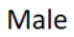

In [ ]:
img = cv2.imread('/content/tr.PNG')
cv2_imshow(img)

In [ ]:
# Download the CRNN model and Load it
model = cv2.dnn.readNet('/content/gdrive/MyDrive/crnn.onnx')
model

<dnn_Net 0x7f033caa41d0>

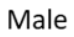

In [ ]:
# ## Prepare the image
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(img_gray)

In [ ]:
blob = cv2.dnn.blobFromImage(img_gray, scalefactor=1/127.5, size=(100,32), mean=127.5)

In [ ]:
# Pass the image to network and extract per-timestep scores
model.setInput(blob)

In [ ]:
scores = model.forward() #for predictions 
print(scores.shape) #26 time steps , model outputs probabilty of 37 chahracters 

(26, 1, 37)


In [ ]:
alphabet_set = "0123456789abcdefghijklmnopqrstuvwxyz"
blank = '-'

In [ ]:
char_set = blank + alphabet_set

In [ ]:
# Decode the scores to text
def most_likely(scores, char_set):
    text = ""
    for i in range(scores.shape[0]):
        c = np.argmax(scores[i][0])
        text += char_set[c]
    return text

In [ ]:
def map_rule(text): #apply mapping rule
    char_list = []
    for i in range(len(text)):
        if i == 0:
            if text[i] != '-':
                char_list.append(text[i])
        else:
            if text[i] != '-' and (not (text[i] == text[i - 1])):
                char_list.append(text[i])
    return ''.join(char_list)


In [ ]:
def best_path(scores, char_set):
    text = most_likely(scores, char_set)
    final_text = map_rule(text)
    return final_text

In [ ]:
out = best_path(scores, char_set)
print(out)

male
